All modules are installed and working.
   Grades  Attendance  Homework  Test_Scores  Pass_Fail
0      71          65        41           65          0
1      34          88        88           48          0
2      91          94        17           81          0
3      80          91        39           81          0
4      40          88        71           76          0
Grades         int64
Attendance     int64
Homework       int64
Test_Scores    int64
Pass_Fail      int64
dtype: object
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.97
GradientBoostingClassifier Accuracy: 0.98
SVC Accuracy: 0.98
Cross-validation scores: [0.95   0.9625 0.975  0.95   0.9875]
Mean cross-validation score: 0.97


/var/folders/q5/3gdpzhz56vdb5ymrs8jgrsdc0000gn/T/ipykernel_86457/3651023129.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feature_importance.head(10), palette='viridis')


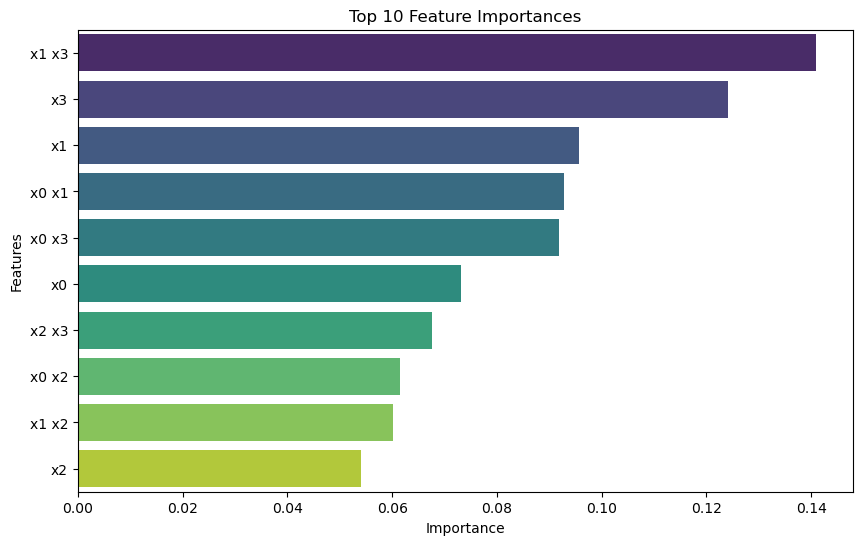

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print("All modules are installed and working.")

# Load the dataset
data = pd.read_csv('student_data.csv')

# Explore the data
# Explore the data
print(data.head())
print(data.dtypes)

# Split the dataset into features and target variable
X = data.drop('Pass_Fail', axis=1)
y = data['Pass_Fail']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter Tuning with Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           scoring='accuracy')
grid_search.fit(X_train_poly, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate other models
models = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42)
}
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Cross-validation on the selected model
scores = cross_val_score(grid_search.best_estimator_, X_train_poly, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

# Plotting Feature Importance (Random Forest) using Seaborn
best_rf = grid_search.best_estimator_
features = poly.get_feature_names_out()
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'Features': features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
